In [11]:
import pypianoroll
import os
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [12]:
midifolder = '../data/giantmidi_small/'
midifiles = os.listdir(midifolder)
test_file = midifiles[2]
print(test_file)

Abel, Frederic, Lola Polka, SLNJF0uiqRw.mid


In [13]:
main_piece = pypianoroll.read(midifolder + test_file)

In [14]:
pr = main_piece.tracks[0].pianoroll

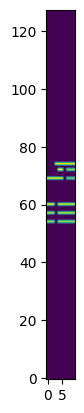

In [15]:
plt.imshow(pr[315:325,:].T, origin='lower')

In [16]:
# load twice, for melody and accompaniment, and delete complementary material
melody_piece = pypianoroll.read(midifolder + test_file)
accomp_piece = pypianoroll.read(midifolder + test_file)

mel_pr = melody_piece.tracks[0].pianoroll
acc_pr = accomp_piece.tracks[0].pianoroll

In [17]:
np.max( np.nonzero(mel_pr[320,:]) )

74

In [18]:
pr = np.array(melody_piece.tracks[0].pianoroll)
running_melody = -1
i = 0
for i in range( pr.shape[0] ):
    # check if any note
    if np.sum(pr[i,:]) > 0:
        # get running max
        running_max = np.max( np.nonzero( pr[i,:] ) )
        print('running_max: ', running_max)
        # check if there exists a running melody
        if running_melody > -1:
            print('running_melody > -1: ', running_melody)
            # check if running melody is continued
            if running_melody == running_max:
                print('running_melody == running_max: ', running_max)
                # remove all lower pitches from melody
                mel_pr[i, :running_max] = 0
                # remove higher pitch from accomp
                acc_pr[i, running_max] = 0
            else:
                print('running_melody != running_max: ', running_melody, running_max)
                # running melody is not continued
                # check if new highest pitch just started
                if running_max > running_melody:
                    # a new higher note has started
                    # finish previous note that was highest until now
                    j = 0
                    while j+i < mel_pr.shape[0] and mel_pr[i+j, running_melody] > 0:
                        mel_pr[i+j, :running_melody] = 0
                        mel_pr[i+j, running_melody+1:running_max] = 0
                        acc_pr[i+j, running_melody] = 0
                        acc_pr[i+j, running_max] = 0
                        j += 1
                    # start new running melody
                    running_melody = running_max
                else:
                    # i should be > 0 since we have that running_melody > -1
                    # a lower note has come
                    # if has begun earlier, it should be ignored
                    if pr[i-1, running_max] > 0:
                        print('lower max should be ignored: ', pr[i-1, running_max], pr[i, running_max], running_max)
                        # its continuing an existing note - not part of melody
                        mel_pr[i, :] = 0
                        # running max should not be canceled, it remains as ghost max
                        # until a new higher max or a fresh lower max starts
                    else:
                        # a new fresh lower max starts that shouldn't be ignored
                        print('lower max should NOT be ignored: ', pr[i-1, running_max], pr[i, running_max], running_max)
                        # start new running melody
                        running_melody = running_max
                        # remove all lower pitches from melody
                        mel_pr[i, :running_max] = 0
                        # remove higher pitch from accomp
                        acc_pr[i, running_max] = 0
        else:
            # no running melody, check max conditions
            print('new note started: ', running_melody, running_max)
            # new note started - make it the running melody
            running_melody = running_max
            # remove all lower pitches from melody
            mel_pr[i, :running_max] = 0
            # remove higher pitch from accomp
            acc_pr[i, running_max] = 0
        # end if
    else:
        # there is a gap
        running_melody = -1
    # end if
# end for

running_max:  62
new note started:  -1 62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > -1:  62
running_melody == running_max:  62
running_max:  62
running_melody > 

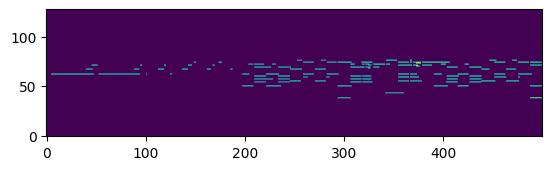

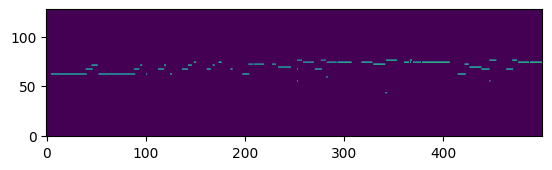

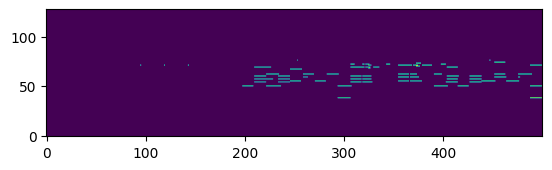

In [19]:
plt.imshow(pr[0:500,:].T, origin='lower')
plt.show()
plt.imshow(mel_pr[0:500,:].T, origin='lower')
plt.show()
plt.imshow(acc_pr[0:500,:].T, origin='lower')